In [99]:
import re
import nltk
import string
import numpy as np # linear algebra
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from nltk.stem import WordNetLemmatizer


In [101]:
df = pd.read_csv("C:/Users/My world/Downloads/Tweets.csv")
df

,textID,text,selected_text,sentiment
0,cb774db0d1,"I`d have responded, if I were going","I`d have responded, if I were going",neutral
1,549e992a42,Sooo SAD I will miss you here in San Diego!!!,Sooo SAD,negative
2,088c60f138,my boss is bullying me...,bullying me,negative
3,9642c003ef,what interview! leave me alone,leave me alone,negative
4,358bd9e861,"Sons of ****, why couldn`t they put them on t...","Sons of ****,",negative
...,...,...,...,...
27476,4eac33d1c0,wish we could come see u on Denver husband l...,d lost,negative
27477,4f4c4fc327,I`ve wondered about rake to. The client has ...,", don`t force",negative
27478,f67aae2310,Yay good for both of you. Enjoy the break - y...,Yay good for both of you.,positive
27479,ed167662a5,But it was worth it ****.,But it was worth it ****.,positive


In [103]:
df.shape

(27481, 4)

In [105]:
df.isnull().sum()

textID           0
text             1
selected_text    1
sentiment        0
dtype: int64

In [107]:
df.duplicated().sum()

0

In [109]:
df.dropna(inplace=True)

In [111]:
df['sentiment'].value_counts()

sentiment
neutral     11117
positive     8582
negative     7781
Name: count, dtype: int64

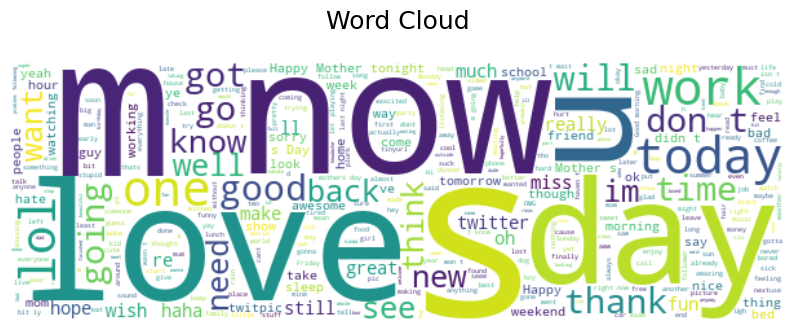

In [113]:
from wordcloud import WordCloud
text_data = " ".join(df['text'].dropna())
wordcloud = WordCloud(width=600, height=200, 
                      background_color='white', 
                      colormap='viridis',
                      max_words=500,
                      contour_width=1, 
                      contour_color='steelblue').generate(text_data)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Word Cloud", fontsize=18, y=1.1, )
plt.show()

In [114]:
df['text'] = df['text'].apply(lambda tweet: str.lower(tweet))

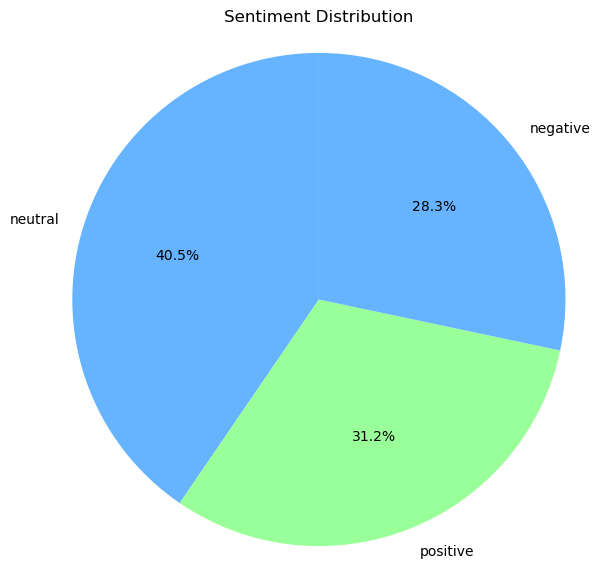

In [117]:
sentiment_counts = df['sentiment'].value_counts()
plt.figure(figsize=(7, 7))
plt.pie(sentiment_counts, labels=sentiment_counts.index, autopct='%1.1f%%', startangle=90, colors=['#66b3ff', '#99ff99'])
plt.title('Sentiment Distribution')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

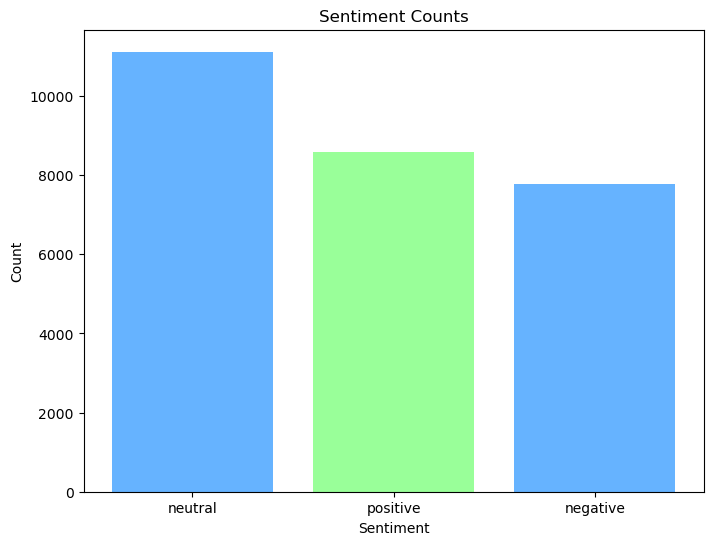

In [119]:
plt.figure(figsize=(8, 6))
plt.bar(sentiment_counts.index, sentiment_counts, color=['#66b3ff', '#99ff99'])
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.title('Sentiment Counts')
plt.show()

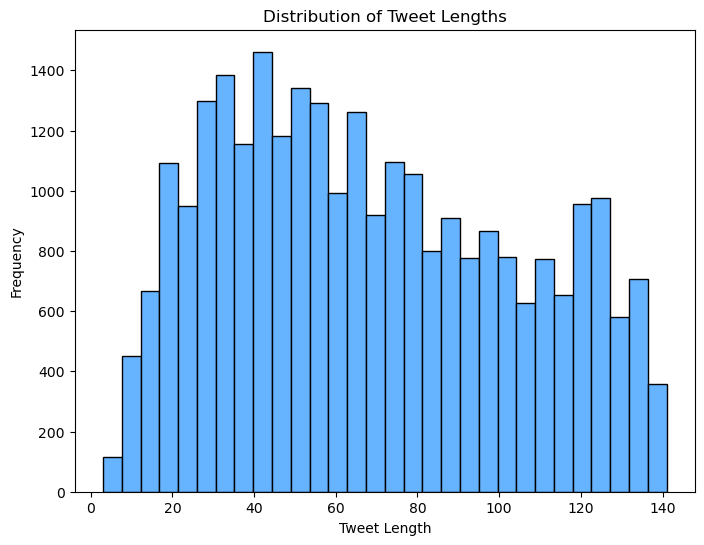

In [141]:
df['tweet Length'] = df['text'].apply(len)


# Plot histogram
plt.figure(figsize=(8, 6))
plt.hist(df['tweet Length'], bins=30, color='#66b3ff', edgecolor='black')
plt.xlabel('Tweet Length')
plt.ylabel('Frequency')
plt.title('Distribution of Tweet Lengths')
plt.show()

In [95]:
X = df['text']
y = df['sentiment']

In [79]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer  # or TfidfVectorizer for more advanced
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report


In [81]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [83]:
vectorizer = CountVectorizer(stop_words='english', max_features=5000)  # You can use TfidfVectorizer for better results
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)


In [84]:
model = LogisticRegression(max_iter=200)
model.fit(X_train_vec, y_train)

LogisticRegression(max_iter=200)

In [86]:
y_pred = model.predict(X_test_vec)


In [87]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

Accuracy: 68.38%


In [88]:
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

    negative       0.69      0.59      0.64      1572
     neutral       0.64      0.72      0.67      2236
    positive       0.75      0.73      0.74      1688

    accuracy                           0.68      5496
   macro avg       0.69      0.68      0.68      5496
weighted avg       0.69      0.68      0.68      5496



In [56]:
new_tweet = ["I love this product!"]
new_tweet_vec = vectorizer.transform(new_tweet)
new_prediction = model.predict(new_tweet_vec)
print("\nPrediction for new tweet:", "Positive" if new_prediction == 1 else "Negative")


Prediction for new tweet: Negative
